## 1. Load and preprocess data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten
    
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\amrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amrik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# import os
# if os.path.exists('/content/imageProcessing') == False:
#   !git clone https://github.com/amrik220/imageProcessing

In [3]:
# Display output of all code lines in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# to reproduce results
seed = 220
rng = np.random.RandomState(seed)

In [5]:
# load data labels from the csv file
data = pd.read_csv('./emergency_class_labels.csv')
# data = pd.read_csv('/content/imageProcessing/classify_as_emergency_vehicle/emergency_class_labels.csv')

data.head()
data.shape

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


(2352, 2)

In [6]:
# check class balance
data.emergency_or_not.value_counts()
data.emergency_or_not.value_counts()[1]/data.emergency_or_not.value_counts()[0]*100

0    1361
1     991
Name: emergency_or_not, dtype: int64

72.81410727406319

In [7]:
# load images and store it in a numpy array
x = []
for img_name in data.image_names:
    img = plt.imread('./images/' + img_name)
#     img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

    x.append(img)
    
x = np.array(x)

# create target
y = data.emergency_or_not.values

x.ndim, x.shape

(4, (2352, 224, 224, 3))

In [8]:
# preprocessing
x_min = x.min()
x_max = x.max()
x = (x - x_min) / (x_max - x_min)

In [9]:
# Split into Train and Test set
X_train, X_valid, Y_train, Y_valid=train_test_split(x,y,test_size=0.3, random_state=seed)

## 3. Model Building

In [10]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.fit(X_train, Y_train, epochs=2, validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid,Y_valid))


Train on 1646 samples, validate on 706 samples
Epoch 1/2
1646/1646 [==============================] - 403s 245ms/step - loss: 0.6620 - accuracy: 0.6142 - val_loss: 0.6070 - val_accuracy: 0.6870
Epoch 2/2
1646/1646 [==============================] - 430s 262ms/step - loss: 0.5855 - accuracy: 0.7090 - val_loss: 0.5767 - val_accuracy: 0.6983


In [14]:
### MaxPool2D

In [15]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
__________________________________________

In [17]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/2
1646/1646 [==============================] - 357s 217ms/step - loss: 0.6764 - accuracy: 0.5711 - val_loss: 0.6388 - val_accuracy: 0.6671
Epoch 2/2
1646/1646 [==============================] - 370s 225ms/step - loss: 0.6351 - accuracy: 0.6446 - val_loss: 0.6429 - val_accuracy: 0.6317


There is 77 % chance that it is an emergency vehicle
Whereas actual class is  1


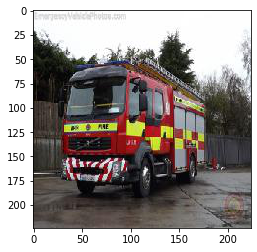

In [18]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('./images/' + img_name)
# img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)


# print probability and actual class
print('There is', prob , '% chance that it is an emergency vehicle')
print('Whereas actual class is ', valid_y[index])

# plot image
plt.imshow(img)

50 % sure that it is emergency
Whereas actual class is  0


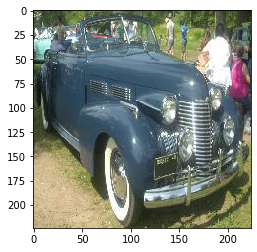

In [19]:
incorrect_indices = np.where(predictions != valid_y)[0]

index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('./images/' + img_name)
# img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

print(prob , '% sure that it is emergency')
print('Whereas actual class is ', valid_y[index])

plt.imshow(img)

## 4. Hyperparameter Tuning

In [20]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

# increase number of convolutional layers
# increase number of pooling layers
# increase number of convolutional filters
# change size of conv
# change size of pooling
# change padding technique
# change stride

In [21]:
# increase number of convolutional and pooling layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(100, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 100)       125100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [23]:
model.fit(X_train, Y_train, epochs=2 , validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/2
1646/1646 [==============================] - 364s 221ms/step - loss: 0.7030 - accuracy: 0.5170 - val_loss: 0.6709 - val_accuracy: 0.6091
Epoch 2/2
1646/1646 [==============================] - 362s 220ms/step - loss: 0.6839 - accuracy: 0.5656 - val_loss: 0.6731 - val_accuracy: 0.6091


In [24]:
# increase number of convolutional filters

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(200, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [25]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/2
1646/1646 [==============================] - 3368s 2s/step - loss: 0.6855 - accuracy: 0.5626 - val_loss: 0.6700 - val_accuracy: 0.6091
Epoch 2/2
1646/1646 [==============================] - 3441s 2s/step - loss: 0.6825 - accuracy: 0.5656 - val_loss: 0.6726 - val_accuracy: 0.6091


In [26]:
# change filter size for convolutional layer and pooling size for pooling layer

from keras.layers import GlobalMaxPool2D

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='valid'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 220, 220, 125)     9500      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 216, 216, 150)     468900    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 150)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 200)       270200    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 225)       405225    
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 225)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)              

In [28]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/2
1646/1646 [==============================] - 3437s 2s/step - loss: 0.7060 - accuracy: 0.5043 - val_loss: 0.6799 - val_accuracy: 0.6091
Epoch 2/2
1646/1646 [==============================] - 3202s 2s/step - loss: 0.6853 - accuracy: 0.5656 - val_loss: 0.6751 - val_accuracy: 0.6091


In [29]:
# change padding technique

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 125)     9500      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 150)     468900    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 200)       270200    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 225)       405225    
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 225)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)              

In [31]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/2
1646/1646 [==============================] - 3161s 2s/step - loss: 0.6485 - accuracy: 0.6446 - val_loss: 0.5785 - val_accuracy: 0.7139
Epoch 2/2
1646/1646 [==============================] - 3413s 2s/step - loss: 0.5529 - accuracy: 0.7230 - val_loss: 0.5133 - val_accuracy: 0.7436


In [ ]:
# change stride

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(2, 2), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

In [ ]:
# VGG equivalent

model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation ='sigmoid'))
model.add(Dense(units=1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, epochs=2,validation_data=(X_valid,Y_valid))
# model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))